# 8.3 Lab: Decision Trees

## 8.3.2 Fitting Regression Trees

In [1]:
# import packages and data
library(rpart)
library(MASS)
boston = Boston

In [2]:
# split the data
set.seed(1)
train_idxs = sample(nrow(boston), nrow(boston)/2)
train = boston[train_idxs, ]
test = boston[-train_idxs, ]

In [3]:
# train a decsion tree and show results
tree_unpruned = rpart(medv ~ ., data=train)
summary(tree_unpruned)

Call:
rpart(formula = medv ~ ., data = train)
  n= 253 

          CP nsplit rel error    xerror       xstd
1 0.46257558      0 1.0000000 1.0127304 0.11772795
2 0.20467339      1 0.5374244 0.5633934 0.05969933
3 0.07461842      2 0.3327510 0.3494856 0.03994467
4 0.03919129      3 0.2581326 0.2960757 0.03997597
5 0.03208187      4 0.2189413 0.3107221 0.04807582
6 0.02162884      5 0.1868595 0.2950782 0.04805304
7 0.01114973      6 0.1652306 0.2614557 0.04260435
8 0.01000000      7 0.1540809 0.2503241 0.03701355

Variable importance
  lstat      rm   indus     nox    crim      zn     dis     age ptratio     rad 
     28      23      12      12      11       9       3       2       1       1 

Node number 1: 253 observations,    complexity param=0.4625756
  mean=22.67312, MSE=82.58758 
  left son=2 (150 obs) right son=3 (103 obs)
  Primary splits:
      lstat   < 9.715    to the right, improve=0.4625756, (0 missing)
      rm      < 6.803    to the left,  improve=0.4235645, (0 missing)
   

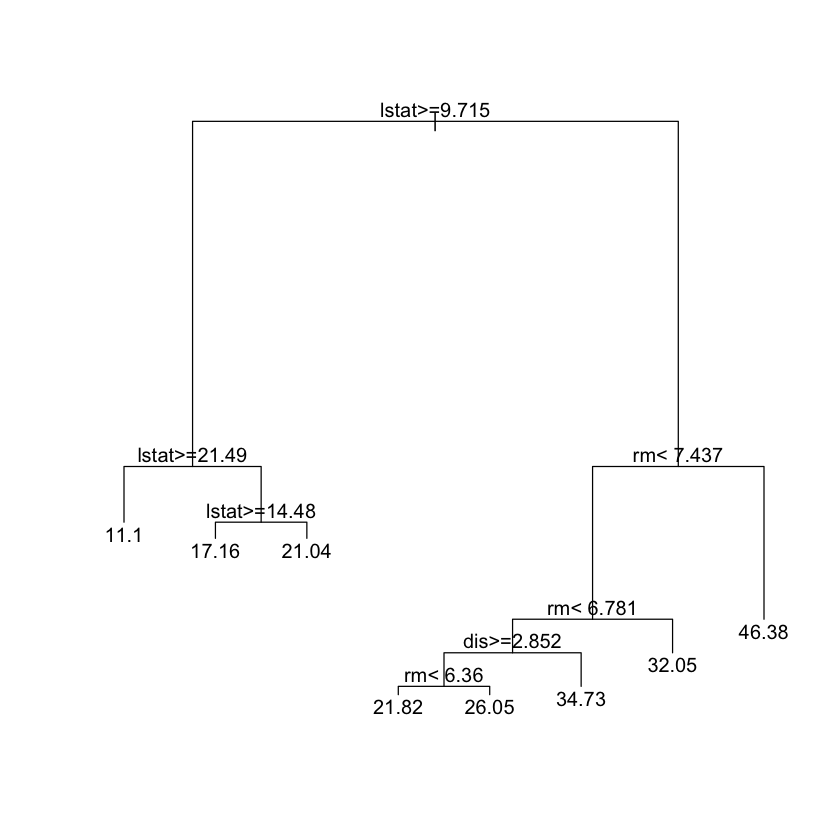

In [4]:
# plot the unpruned tree
plot(tree_unpruned)
text(tree_unpruned)

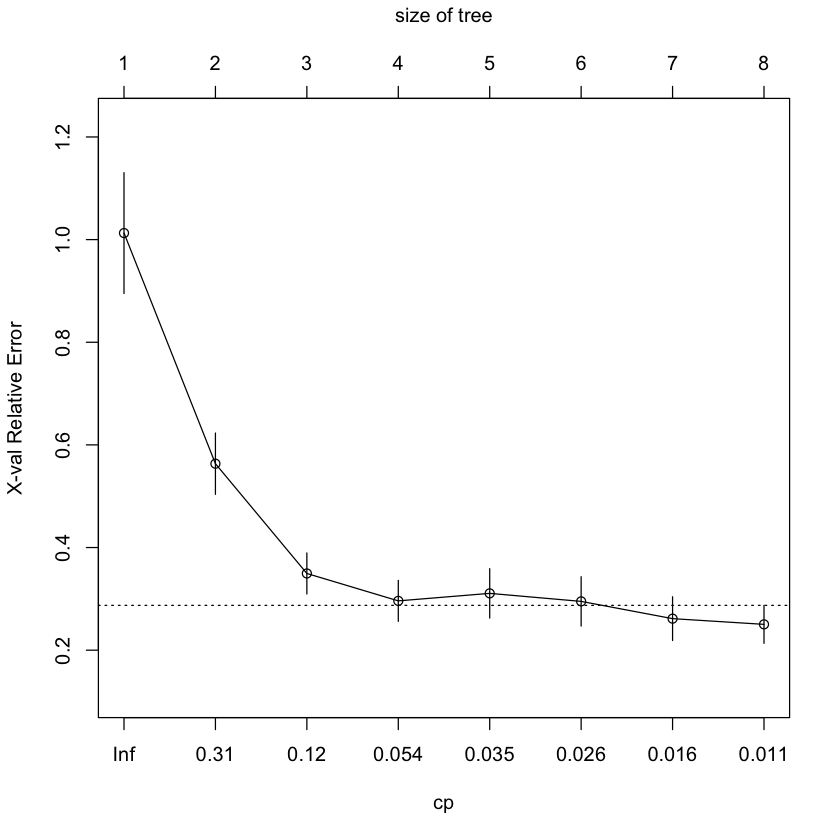

In [5]:
# show a plot of complexity parameter (penalty) versus relative error
plotcp(tree_unpruned)

In [6]:
# prune the tree at the 5th node and show the summary
tree_pruned = prune(tree_unpruned, cp=.035)
summary(tree_pruned)

Call:
rpart(formula = medv ~ ., data = train)
  n= 253 

          CP nsplit rel error    xerror       xstd
1 0.46257558      0 1.0000000 1.0127304 0.11772795
2 0.20467339      1 0.5374244 0.5633934 0.05969933
3 0.07461842      2 0.3327510 0.3494856 0.03994467
4 0.03919129      3 0.2581326 0.2960757 0.03997597
5 0.03500000      4 0.2189413 0.3107221 0.04807582

Variable importance
  lstat      rm   indus     nox    crim      zn     dis ptratio 
     29      24      13      12      11       9       1       1 

Node number 1: 253 observations,    complexity param=0.4625756
  mean=22.67312, MSE=82.58758 
  left son=2 (150 obs) right son=3 (103 obs)
  Primary splits:
      lstat   < 9.715    to the right, improve=0.4625756, (0 missing)
      rm      < 6.803    to the left,  improve=0.4235645, (0 missing)
      indus   < 3.985    to the right, improve=0.2666899, (0 missing)
      ptratio < 18.55    to the right, improve=0.2571745, (0 missing)
      nox     < 0.6695   to the right, improve=0

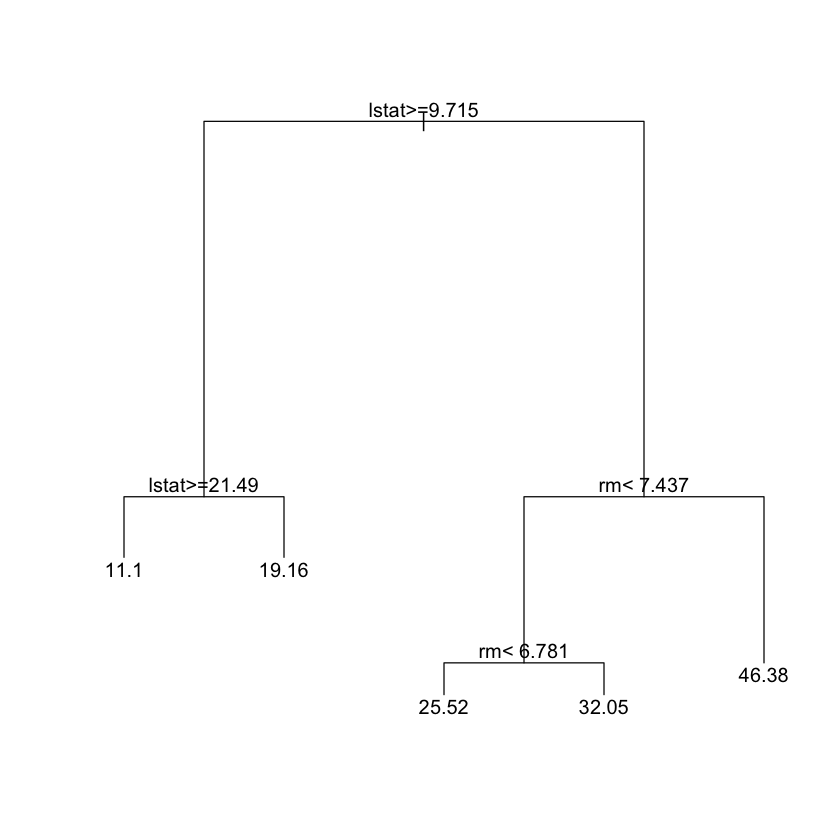

In [7]:
# plot the pruned tree
plot(tree_pruned)
text(tree_pruned)

In [8]:
# find the test mse for the unpruned tree
mean((predict(tree_unpruned, test) - test$medv)^2)

[1] 25.35825

In [9]:
# find the test mse for the pruned tree
mean((predict(tree_pruned, test) - test$medv)^2)

[1] 26.83413

## 8.3.3 Bagging and Random Forests

In [10]:
# import packages
library(randomForest)


# train and test a bagged tree estimator
set.seed(1)
rf_bag = randomForest(medv ~ ., data=train, mtry=13, importance=TRUE)
rf_bag
summary(rf_bag)
mean((predict(rf_bag, test) - test$medv)^2)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = train, mtry = 13, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.15723
                    % Var explained: 86.49

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       253    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       253    -none- numeric  
importance       26    -none- numeric  
importanceSD     13    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               253    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 13.50808

In [11]:
# train and test a bagged tree estimator with only 25 trees
set.seed(1)
rf_25_bags = randomForest(medv ~ ., data=train, mtry=13, importance=TRUE, ntree=25)
rf_25_bags
summary(rf_25_bags)
mean((predict(rf_25_bags, test) - test$medv)^2)


Call:
 randomForest(formula = medv ~ ., data = train, mtry = 13, importance = TRUE,      ntree = 25) 
               Type of random forest: regression
                     Number of trees: 25
No. of variables tried at each split: 13

          Mean of squared residuals: 13.49496
                    % Var explained: 83.66

                Length Class  Mode     
call              6    -none- call     
type              1    -none- character
predicted       253    -none- numeric  
mse              25    -none- numeric  
rsq              25    -none- numeric  
oob.times       253    -none- numeric  
importance       26    -none- numeric  
importanceSD     13    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               253    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 14.13388

In [12]:
# train and test a random forest
set.seed(1)
rf = randomForest(medv ~ ., data=train, mtry=6, importance=TRUE)
rf
summary(rf)
mean((predict(rf, test) - test$medv)^2)


Call:
 randomForest(formula = medv ~ ., data = train, mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 11.8888
                    % Var explained: 85.6

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       253    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       253    -none- numeric  
importance       26    -none- numeric  
importanceSD     13    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               253    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 11.66454

,%IncMSE,IncNodePurity
crim,12.132320,986.50338
zn,1.955579,57.96945
indus,9.069302,882.78261
chas,2.210835,45.22941
nox,11.104823,1044.33776
rm,31.784033,6359.31971
age,10.962684,516.82969
dis,15.015236,1224.11605
rad,4.118011,95.94586
tax,8.587932,502.96719


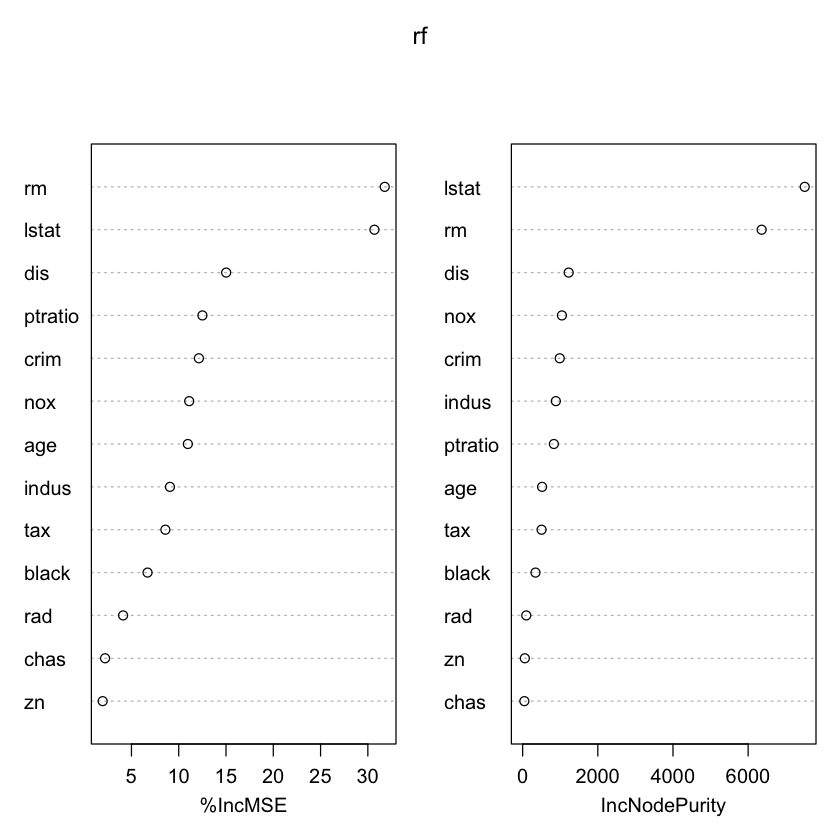

In [13]:
# show and plot the variable importance from the random tree model
importance(rf)
varImpPlot(rf)